<a href="https://colab.research.google.com/github/P4rcival/wooldrige_data_science/blob/main/Estat%C3%ADstica_descritiva_e_regress%C3%A3o_Wooldrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTORY Econometrics: A Modern Approach. 7. ed. [S. l.]: Cengage Learning, 2019. 816 p.

Essa publicação é uma releitura da atividade avaliativa realizada para a matéria de Econometria 2, ministrada pelo Prof. Dr. Keuler Hissa, do Curso de Ciências Econômicas, da Faculdade de Economia, Administração e Contabilidade (FEAC) da Universidade Federal de Alagoas (UFAL).

Todos os dados fazem parte do dataset de Wooldridge: [Link dos datasets](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html) e [Informações sobre os datasets](https://cran.r-project.org/web/packages/wooldridge/wooldridge.pdf)

Realizado com apoio do próprio livro.

Para realizar a execução da análise a seguir, foi utilizado o seguinte modelo:

| Dado |Modelo             
|:------:|:----:
|fertil1|kids = $\beta_0$ + $\beta_1$educ + $\beta_2$ age + $\beta_3$agesq + $\beta_4$meduc + u|----

O qual pretende explicar o número de crianças através da educação, idade, idade ao quadrado e a média de educação dos pais.

<i>This publication is a review of the evaluation activity conducted for the Econometrics 2 course, taught by Professor Dr. Keuler Hissa, from the Economics graduation at the Faculty of Economics, Administration, and Accounting (FEAC) at the Federal University of Alagoas (UFAL).</i>

<i>All the data is part of the Wooldridge dataset: [Link to the datasets](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html) and [Information about the datasets](https://cran.r-project.org/web/packages/wooldridge/wooldridge.pdf)</i>



| Data |Model             
|:------:|:----:
|fertil1|kids = $\beta_0$ + $\beta_1$educ + $\beta_2$ age + $\beta_3$agesq + $\beta_4$meduc + u|----

# <h1> Importação e tratamento de dados
<h2> <i>Data import and data preprocessing</i>

In [ ]:
# Instalando pacotes.
# Installing packages.
!pip install wooldridge
!pip install matplotlib

# Chamando bibliotecas.
# Importing the libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wooldridge
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 15.3 MB/s eta 0:00:00


In [ ]:
# Importando os dados de wooldrige "fertil1" e selecionando variáveis específicas.
# Importing the Wooldrige database "fertil1" and selecting the especific variables.
dados = wooldridge.data('fertil1')
dados = dados[['kids','educ','age','agesq','meduc']]
dados

,kids,educ,age,agesq,meduc
0,4,12,48,2304,8
1,3,17,46,2116,8
2,2,12,53,2809,7
3,2,12,42,1764,12
4,2,12,51,2601,3
...,...,...,...,...,...
1124,1,12,41,1681,12
1125,0,19,42,1764,10
1126,3,15,35,1225,12
1127,2,12,46,2116,12


#<h1>Estatística descritiva
<h2><i>Descriptive statistics</i><br>

Realizando uma estatística descritiva dos dados através de passos econometricos de ajuste e análise.<br>
<i>Conducting a descriptive statistics analysis of the data through econometric steps of adjustment and analysis.</i>


## <h2> Observando as especificidades dos dados
<h3> <i>Observing specifics of the data</i>

In [ ]:
# Chamando função .describe() para descrição dos dados.
# Calling the .describe() function for data description.
dados.describe()

,kids,educ,age,agesq,meduc
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,2.743136,12.690877,43.484500,1924.935341,9.131975
std,1.653899,2.640236,5.836421,515.856380,4.016956
min,0.000000,0.000000,35.000000,1225.000000,0.000000
25%,2.000000,12.000000,38.000000,1444.000000,7.000000
50%,3.000000,12.000000,43.000000,1849.000000,8.000000
75%,4.000000,14.000000,48.000000,2304.000000,12.000000
max,7.000000,20.000000,54.000000,2916.000000,20.000000


O conjunto de dados possuí <b>1120 observações</b> de cada uma das <b>5 variáveis</b>.<br>
A variável <b>"kids"</b> representa o número médio de filhos por pessoa em um conjunto, já a média é de aproximadamente 2,7 filhos, variando de 0 a 7 filhos. Os quartis estão em 2, 3 e 4 filhos.<br>
Para <b>"educ"</b> temos o nível médio de educação em anos das pessoas no conjunto de dados. A média é de cerca de 12.7 anos de educação, variando de 0 a 20 anos. Os quartis estão em 12, 12 e 14 anos.<br>
Para a variável <b>"age"</b> temos estabelecido idade média das pessoas no conjunto de dados. A média é de aproximadamente 43.5 anos, variando de 35 a 54 anos. Os quartis estão em 38, 43 e 48 anos.<br>
<b>"agesq"</b> representa o quadrado da idade (age²) para representar exponencialidade no modelo.<br>
Por fim, <b>"meduc"</b> representa o nível médio de educação da mãe em anos. A média é de cerca de 9.1 anos de educação, variando de 0 a 20 anos. Os quartis estão em 7, 8 e 12 anos.


---

<i>
The dataset consists of <b>1120 observations</b> for each of the <b>5 variables</b>.<br>
<b>"Kids"</b> represents the average number of children per person in the dataset, with a mean of approximately <b>2.7 children</b>, ranging from <b>0 to 7 children</b>. The quartiles are at <b>2, 3, and 4 children</b>.<br>
For <b>"Educ,"</b> it denotes the average level of education in years for the individuals in the dataset. The mean is around <b>12.7 years of education</b>, ranging from <b>0 to 20 years</b>. The quartiles are at <b>12, 12, and 14 years</b>.<br>
The <b>"Age"</b> variable represents the established average age of the people in the dataset. The mean age is approximately <b>43.5 years</b>, ranging from <b>35 to 54 years</b>. The quartiles are at <b>38, 43, and 48 years</b>.<br>
<b>"Agesq"</b> represents the square of age (age²) to account for exponential effects in the model.<br>
Finally, <b>"Meduc"</b> represents the average years of education for mothers. The mean is approximately <b>9.1 years of education</b>, ranging from <b>0 to 20 years</b>. The quartiles are at <b>7, 8, and 12 years</b>.<br>
</i>

## <h2> Fazendo um boxplot dos dados com base em uma dummy
<h3> <i>Creating a boxplot of the data based on a dummy variable</i>

<Axes: xlabel='kids', ylabel='educ10'>

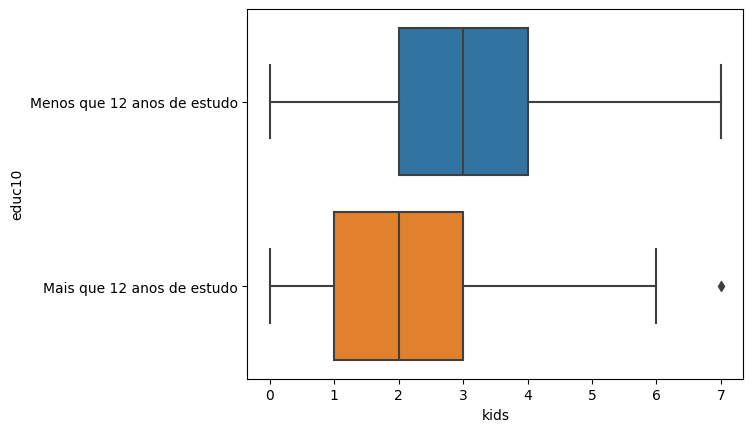

In [ ]:
# Fazendo dummy "educ10" para caso a mãe tenha mais do que 12 anos de estudo.
# Creating a 'educ10' dummy variable for cases where the mother has more than 12 years of education.
dados['educ10'] = np.where(dados['meduc'] > 12, 'Mais que 12 anos de estudo', 'Menos que 12 anos de estudo')

# Plotando o boxplot.
# Plotting the boxplot graph.
sns.boxplot(data=dados, x='kids', y='educ10')


Podemos observar no boxplot que, <b>mulheres com menos de 12 anos de estudo têm, em média, mais filhos do que mulheres com mais de 12 anos de estudo</b>. A mediana do número de filhos das mulheres com menos de 12 anos de estudo é de 3, enquanto a mediana do número de filhos das mulheres com mais de 12 anos de estudo é de 2.<br>
O intervalo interquartil das mulheres com menos de 12 anos de estudo é maior do que o intervalo interquartil das mulheres com mais de 12 anos de estudo, <b>isso significa que há uma maior variação no número de filhos entre as mulheres com menos de 12 anos de estudo.</b>


---

<i>
We can observe from the boxplot that <b>women with less than 12 years of education, on average, have more children than women with more than 12 years of education</b>. The median number of children for women with less than 12 years of education is 3, while the median for women with more than 12 years of education is 2.<br>
The interquartile range of women with less than 12 years of education is larger than the interquartile range of women with more than 12 years of education, <b>indicating that there is greater variation in the number of children among women with less than 12 years of education.</b>
</i>

## <h2> Construindo uma nova variável categórica e analisando através do agrupamento com a variável dependente do modelo (usando a média como parâmetro)
<h3><i>Building a new categorical variable and analyzing it through grouping with the model's dependent variable (using the mean as a parameter)</i>


In [ ]:
# Criando uma função para descrição da meduc, caso meduc < que sua média, "Abaixo da média", caso contrário, "Acima da média".
# Creating a function to describe "meduc," if meduc is less than its mean, it's "Abaixo da média" (Below average), otherwise, it's "Acima da média" (Above Average).
def descritiva_meduc(meduc):
    if meduc < dados['meduc'].mean():
        return "Abaixo da média"
    else:
        return "Maior que a média"

# Criando uma dummy para a variável descritiva.
# Creating a dummy to the descritive variable.
dados['meduc_2'] = dados['meduc'].apply(descritiva_meduc)

# Printando os dados da média de kids para as variáveis descritivas criadas com a dummy, conforme o feito acima.
# Printing the mean date of kids to the descritive variables created with the dummy, as did before.
dados.groupby('meduc_2')['kids'].mean()

meduc_2
Abaixo da média      2.960380
Maior que a média    2.467871
Name: kids, dtype: float64

As mulheres com educação abaixo da média têm, em média, 2,96 filhos, enquanto as mulheres com educação maior que a média têm, em média, 2,47 filhos. Isso significa que, em média, as <b>mulheres com educação abaixo da média têm propenção a ter mais filhos do que as mulheres com educação maior que a média.</b>

---

<i>
Women with education below the average have, on average, 2.96 children, while women with education above the average have, on average, 2.47 children. This means that, on average, <b>women with education below the average tend to have more children than women with education above the average.</b>
</i>

## <h2> Avaliando a correlação entre as variáveis
<h3> <i>Evaluating the correlation between the variables</i>

In [ ]:
# Redefinindo a base de dados "dados" e chamando as variáveis específicas.
# Resetting the dataset "dados" and calling specific variables.
dados = wooldridge.data('fertil1')
dados = dados[['kids','educ','age','agesq','meduc']]

# Realizando a correlação entre as variáveis do modelo.
# Performing the correlation analysis between the model's variables.
dados.corr()

,kids,educ,age,agesq,meduc
kids,1.000000,-0.223047,0.107500,0.100749,-0.135271
educ,-0.223047,1.000000,-0.101940,-0.099041,0.467102
age,0.107500,-0.101940,1.000000,0.998330,-0.178865
agesq,0.100749,-0.099041,0.998330,1.000000,-0.177746
meduc,-0.135271,0.467102,-0.178865,-0.177746,1.000000


<b>A matriz representa a correlação entre as cada uma das variáveis "kids", "educ", "age", "agesq" e "meduc".</b></br>
<b>Kids e educ:</b> Apresentam um valor negativo (-0.223047), ou seja,  uma correlação negativa  entre o número de filhos e o nível de educação, indicando que, quando o nível de educação sobe o nivel do numero de filhos diminui.</br>
<b>Kids e age:</b> A correlação entre as variaveis é positiva (0.107500), mas positivamente fraca, essa relação indica que em média, pessoas mais velhas tem  tendência a ter um número um pouco maior de filhos.</br>
<b>Kids e agesq:</b> Ela parte do mesmo pressuposto da anterior, apresentado uma correlação  de  0.100749, o que indica uma correlação positivamente fraca. Por ser a variavel age ao quadrado, podemos concluir que a medida que a idade aumenta o número de filhos tem a tendência á aumentar.</br>
<b>Kids e meduc:</b> A correlação entre eles é negativa (-0.135271), o que indica  uma correlação negativa fraca entre o número de filhos e a educação média da mãe, logo, quanto mais tempo de educação tem a mãe, menos filhos tende a ter, em média.</br>


---


<i>
<b>The matrix represents the correlation between the variables "kids" "educ" "age" "agesq" and "meduc."</b></br>
<b>Kids and educ:</b> They have a negative value (-0.223047), indicating a negative correlation between the number of children and the level of education. This suggests that as the level of education increases, the number of children tends to decrease.</br>
<b>Kids and age:</b> The correlation between these variables is positive (0.107500), but it's a weak positive correlation. This suggests that, on average, older people tend to have slightly more children.</br>
<b>Kids and agesq:</b> This follows a similar pattern to the previous correlation, with a correlation of 0.100749, indicating a weak positive correlation. As agesq is the square of age, it suggests that as age increases, the number of children tends to increase.</br>
<b>Kids and meduc:</b> The correlation between them is negative (-0.135271), indicating a weak negative correlation between the number of children and the mother's average education. In other words, as the mother's education level increases, the average number of children tends to decrease.
</i>

## <h2> Plotando um histograma da variável dependente
<h3> <i> Plotting a histogram of the dependent variable</i>

<Axes: xlabel='kids', ylabel='Count'>

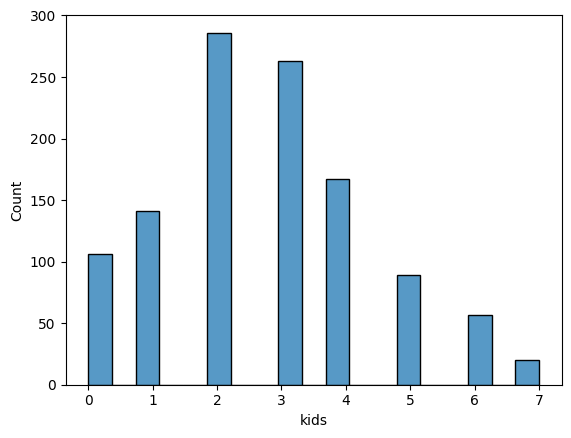

In [ ]:
# Utilizando o seaborn para plotar o histograma através da função .histplot da variável "kids" (dependente).
# Using seaborn to plot the histogram using the .histplot function for the "kids" variable (dependent variable).
sns.histplot(dados['kids'])

Conforme representado no histograma, é mais comum as pessoas terem 2 ou 3 filhos, enquanto o máximo das observações (7 filhos) é extremamente raro e o mínimo (0 filhos) razoavelmente comum.

---

<i>As shown in the histogram, it's more common for people to have 2 or 3 children, while the maximum number of observations (7 children) is extremely rare, and the minimum (0 children) is reasonably common.</i>

## <h2> Plotando um gráfico de dispersão entre a variável dependente e a X1.
<h3> <i>Plotting a scatterplot between the dependent variable and X1.</i>

Text(0.5, 1.0, 'Gráfico de dispersão')

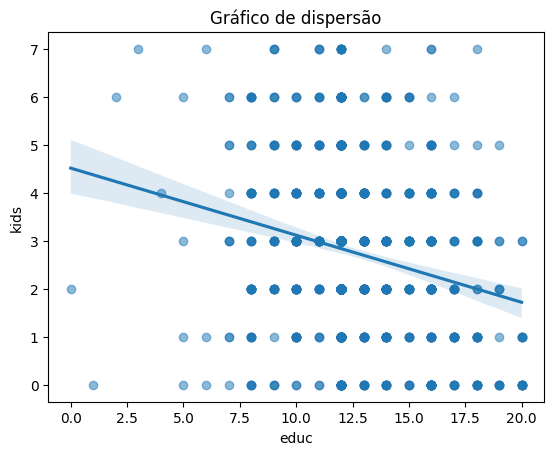

In [ ]:
# Plotando o gráfico de dispersão através da função regplot do seaborn, definindo uma transparência de 50% e definindo um título.
# Plotting the scatterplot using the regplot function from Seaborn, setting a transparency of 50%, and defining a title.
sns.regplot(data=dados,
             y = 'kids',
             x = 'educ', scatter_kws={'alpha': 0.5})
plt.title('Gráfico de dispersão')

O gráfico, embora seja resumido por conta da variação dos dados apresentados, mostra que existe uma correlação negativa entre o nível de escolaridade dos pais e o número de crianças. Ou seja, pais mais escolarizados tendem a ter menos crianças quanto a média e os menos escolarizados.

---

<i>The graph, although summarized due to the data variation presented, shows a negative correlation between the level of education of the parents and the number of children. In other words, more educated parents tend to have fewer children on average compared to less educated parents.</i>

## <h2>Analisando o intervalo interquartil da variável dependente
<h3> <i> Analyzing the interquartile range of the dependent variable </i>

In [ ]:
# Definindo array dos quartis e chamando a função percentile que realiza os percentuais conforme os quartis definidos.
# Defining an array for the quartiles and calling the percentile function to calculate the percentiles based on the defined quartiles.
quartis = [25, 50, 75, 100]
np.percentile(dados.age, quartis)

array([38., 43., 48., 54.])

Primeiro Quartil (Q1): 25% dos dados estão abaixo de 38.

Segundo Quartil (Q2): 50% (ou a mediana) dos dados estão abaixo de 43.

Terceiro Quartil (Q3): 75% dos dados estão abaixo de 48.

Intervalo interquartil (IQR) Q3 - Q1 = 10


---


<i>First Quartile (Q1): 25% of the data is below 38.

Second Quartile (Q2): 50% (or the median) of the data is below 43.

Third Quartile (Q3): 75% of the data is below 48.

Interquartile Range (IQR) Q3 - Q1 = 10</i>

## <h2> Calculando e analisando o coeficiente de variação das variáveis independentes

<h3> Calculating and analyzing the coefficient of variation for the independent variables

In [ ]:
# Realizando uma variável com o produto do erro padrão (std do numpy) e sua média, arredondada em duas casas para se obter o coeficiente.
# Creating a variable with the product of the standard error (numpy's std) and its mean, rounded to two decimal places to obtain the coefficient.
cv_educ = round(np.std(dados['educ']) / dados['educ'].mean(),2)

# Printando o coeficiente de cada uma das variáveis.
# Printing the coefficient for each of the variables.
print(f"O coeficiente de variação da variável educ é {cv_educ}")

cv_meduc = round(np.std(dados['meduc']) / dados['meduc'].mean(),2)
print(f"O coeficiente de variação da variável meduc é {cv_meduc}")

cv_age = round(np.std(dados['age']) / dados['age'].mean(),2)
print(f"O coeficiente de variação da variável age é {cv_age}")

cv_agesq = round(np.std(dados['agesq']) / dados['agesq'].mean(),2)
print(f"O coeficiente de variação da variável agesq é {cv_agesq}")

O coeficiente de variação da variável educ é 0.21
O coeficiente de variação da variável meduc é 0.44
O coeficiente de variação da variável age é 0.13
O coeficiente de variação da variável agesq é 0.27


A variabilidade da variável "educ" (Educação) é relativamente baixa, representando 21% da média. Sugerindo que a maioria dos valores está próxima da média da variável de educação. Já a variável "meduc" (Educação da mãe) é mais alta, representando 44% da média. Isso indica uma maior dispersão dos valores em relação à média da educação da mãe.

Para a variável "age" (Idade) temos uma baixa, variação, representando apenas 13% da média. Isso sugere que a maioria das idades está próxima da média da variável de idade, contudo a variabilidade da variável "agesq" (Idade ao quadrado) é moderada, representando 27% da média, indicando uma dispersão razoável dos valores em relação à média dos quadrados da idade.

---

<i> The variability of the "educ" (Education) variable is relatively low, accounting for 21% of the mean. This suggests that most values are close to the mean of the education variable. In contrast, the "meduc" (Mother's Education) variable has higher variability, representing 44% of the mean. This indicates a greater spread of values relative to the mean of mother's education.

As for the "age" (Age) variable, there is low variation, accounting for only 13% of the mean. This suggests that most ages are close to the mean of the age variable. However, the variability of the "agesq" (Age squared) variable is moderate, representing 27% of the mean, indicating a reasonable dispersion of values concerning the mean of the age squares.</i>

# <h1> Regressão linear
<h2> <i> Linear regression </i><br>

Realizando uma análise econometrica de regressão linear das variáveis e levando em consideração o modelo definido anteriormente.
<i>Performing an econometric analysis of linear regression on the variables, taking into account the previously defined model.</i>

##<h2>Rodando uma regressão linear múltipla com o metódo dos mínimos quadrados ordinários (MQO) com o seu respectivo modelo e analise os resultados do sumário da regressão

<h3><i>Running a multiple linear regression using the Ordinary Least Squares (OLS) method with the corresponding model and analyzing the results from the regression summary</i>

In [ ]:
# Importanto biblioteca statsmodels para realizar a regressão através do sm.OLS
# Importing statsmodels library to use the regreassion function "sm.OLS"
import statsmodels.api as sm

# Adicionando constante para o intercepto
# Adding a constant to the intercept
dados['const'] = 1

# Criação das variáveis para determinar as dependentes e independentes (Adicionado com a constante)
# Creating variables to determinate the dependent and independent variables (with the constant)
x = dados[['const', 'educ','age','agesq','meduc']]
y = dados['kids']

# Chamando a função sm.OLS (Ordinary Least Square) de "reg" para chamar posteriormente seu summary()
# Calling the sm.OLS (Ordinary Least Square) function as reg to call it summary later
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   kids   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     20.61
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.10e-16
Time:                        17:11:46   Log-Likelihood:                -2129.6
No. Observations:                1129   AIC:                             4269.
Df Residuals:                    1124   BIC:                             4294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6485      3.104     -2.464      0.0

O modelo de regressão é em parte significativo, devido ao  R² estar abaixo do ideal, o que indica que as variáveis independentes explicam apenas uma pequena parte da variabilidade em "kids" (Y variavel dependente). Podemos destacar a que a normalidade dos resíduos, por apresentar  valores baixos no teste Omnibus e Jarque-Bera. Outro fator a ser destacado é a multicolinearidade encontrada.<br><br>
Por partes:<br>
<b>R²:</b> Neste caso, o modelo explica aproximadamente 6,8% da variação na variável "kids". Isso indica que o modelo não explica a maioria da variação na quantidade de filhos.<br>
<b>Coef:</b> Os coeficientes indicam relação positiva somente entre idade e o número de filhos, conforme demonstrado anteriormente, já entre as outras variáveis independentes temos uma relação negativa.<br>
Coef <b>"educ"</b> tem um coeficiente de -0,1235. Isso significa que um aumento de uma unidade na educação (anos de educação) está associado a uma redução de aproximadamente 0,1235 na quantidade de filhos.<br>
Coef <b>"age"</b> tem um coeficiente de 0,5330. Isso indica que um aumento de uma unidade na idade está associado a um aumento de aproximadamente 0,5330 na quantidade de filhos.<br>
Coef <b>"agesq"</b> tem um coeficiente de -0,0058. Isso sugere que o quadrado da idade tem um efeito negativo na quantidade de filhos, mas o efeito é pequeno.<br>
Coef <b>"meduc"</b> tem um coeficiente de -0,0111, mas o valor p (P>|t|) é alto (0,413), o que sugere que a variável "meduc" pode não ser estatisticamente significativa para prever a quantidade de filhos.<br>
<b>F-statistic:</b> O valor de 20,61 no teste F sugere que, no geral, o modelo é estatisticamente significativo.<br>
<b>Prob (F-statistic):</b> O valor de 2,10e-16 é a probabilidade associada ao teste F e é extremamente baixo, o que indica que pelo menos uma das variáveis independentes no modelo é significativa.<br>
<b>Jarque-Bera (JB):</b> Um valor baixo de p (0,000117) sugere que os resíduos não seguem uma distribuição normal, o que pode indicar que o modelo não se ajusta bem aos dados e identifica assimetria.<br>
Em resumo, o modelo não explica muito da variação na quantidade de filhos, e algumas variáveis não são estatisticamente significativas. Além disso, os resíduos não seguem uma distribuição normal, o que pode indicar que o modelo pode não ser a melhor representação dos dados.

---
<i>
The regression model is partially significant, as the <b>R²</b> is below the ideal, indicating that the independent variables explain only a small portion of the variability in <i>kids</i> (the dependent variable). Noteworthy is the normality of the residuals, as they exhibit low values in both the <i>Omnibus</i> and <i>Jarque-Bera</i> tests. Another factor to highlight is the presence of multicollinearity.

Breaking it down:

<b>R²:</b> In this case, the model explains approximately 6.8% of the variation in the <i>kids</i> variable. This indicates that the model does not explain the majority of the variation in the number of children.

<b>Coeficients:</b> The coefficients show a positive relationship only between <i>age</i> and the number of children, as previously demonstrated. For the other independent variables, we have a negative relationship.

<b>Coef "educ":</b> It has a coefficient of -0.1235, which means that an increase of one unit in education (years of education) is associated with a reduction of approximately 0.1235 in the number of children.

<b>Coef "age":</b> It has a coefficient of 0.5330, indicating that an increase of one unit in age is associated with an increase of approximately 0.5330 in the number of children.

<b>Coef "agesq":</b> It has a coefficient of -0.0058, suggesting that the square of age has a negative effect on the number of children, but the effect is small.

<b>Coef "meduc":</b> It has a coefficient of -0.0111, but the p-value (P>|t|) is high (0.413), suggesting that the <i>meduc</i> variable may not be statistically significant in predicting the number of children.

<b>F-statistic:</b> The value of 20.61 in the F-test suggests that, overall, the model is statistically significant.

<b>Prob (F-statistic):</b> The value of 2.10e-16 is the probability associated with the F-test and is extremely low, indicating that at least one of the independent variables in the model is significant.

<b>Jarque-Bera (JB):</b> A low value of p (0.000117) suggests that the residuals do not follow a normal distribution, which may indicate that the model does not fit the data well and identifies skewness.

In summary, the model does not explain much of the variation in the number of children, and some variables are not statistically significant. Additionally, the residuals do not follow a normal distribution, indicating that the model may not be the best representation of the data.
</i>

## <h2> Verificando e analisando a normalidade dos resíduos a partir de um QQ-plot e do teste de Jarque-Bera
<h3> <i>Verifying and analyzing the normality of the residuals through a QQ-plot and the Jarque-Bera test. </i>

Estatística Jarque-Bera = 18.1
Valor P = 0.0
Coeficiente de assimetria = 0.3
Coeficiente de curtose = 2.84


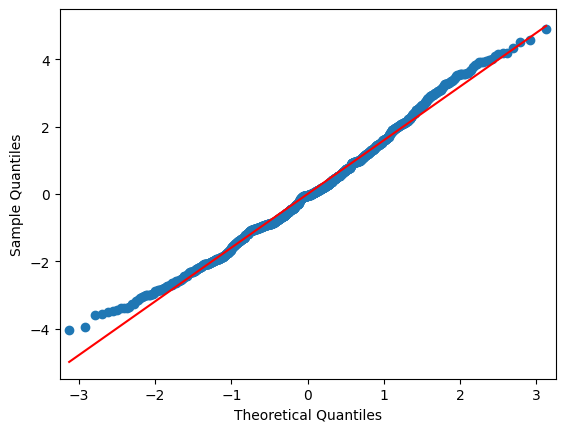

In [ ]:
# Importando o teste jarque_bera presente na biblioteca do statsmodels
# Importing jarque_bera test from the statsmodels library
from statsmodels.stats.stattools import jarque_bera

# Apresentando os resíduos a partir de um QQ-Plot
# Showing the residues with a QQ-Plot
sm.qqplot(reg.resid, line = 's')

# Realizando o teste Jarque-Bera
# Doing a Jarque-Bera test
jb_test = sm.stats.jarque_bera(reg.resid)

# Printando cada um dos resultados do teste
# Printing each one of tests results
print(f'Estatística Jarque-Bera =', round(jb_test[0],2))
print(f'Valor P =', round(jb_test[1],2))
print(f'Coeficiente de assimetria =', round(jb_test[2],2))
print(f'Coeficiente de curtose =', round(jb_test[3],2))

 Os resultados trazidos no gráfico indicam que os dados não seguem uma distribuição normal, uma vez que o valor p relacionado ao teste Jarque-Bera é baixo. Além disso, os coeficientes de assimetria e curtose dá a enteder que a distribuição dos dados é levemente assimétrica (positiva).

---

 <i>
 The results shown in the plot indicate that the data does not follow a normal distribution, as the p-value related to the Jarque-Bera test is low. Additionally, the skewness and kurtosis coefficients suggest that the data distribution is slightly positively skewed.
 </i>

## <h2> Verificando e analisando a multicolineariedade entre as variáveis
<h3> <i> Verifying and analyzing the multicollinearity among the variables </i>

In [ ]:
# Importanto VIF (Fatores de Inflação da Variância) do statsmodels
# Importing the Variance Inflation Factor (VIF) from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Dropando a constante que foi colocada como intercepto anteriormente
# Dropping the constant that was previously included as an intercept
x_sc = x.drop('const', axis=1)

# Criando uma função para visualização do VIF em tabela
# Creating a function to display the VIF in a table
def vif(x):
    viftab = []
    for i, col in enumerate(x.columns):
        vif = variance_inflation_factor(x.values, i)
        viftab.append((col, vif))
    viftab = pd.DataFrame(viftab)
    viftab = viftab.drop(0, axis=0) # retirando a coluna do intercepto 'const'
    viftab = viftab.rename(columns={0: 'Variável', 1: 'VIF'})
    vif_mean = viftab['VIF'].mean()
    viftab = viftab.append({'Variável': 'Média', 'VIF': vif_mean}, ignore_index=True)
    x.viftab = viftab
    return viftab

# Abrindo a função de VIF
# Opening the VIF function
x_sc2 = variance_inflation_factor(x_sc, 0)
vif(x)

<ipython-input-13-cc6349317fb9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viftab = viftab.append({'Variável': 'Média', 'VIF': vif_mean}, ignore_index=True)
<ipython-input-13-cc6349317fb9>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.viftab = viftab


,Variável,VIF
0,educ,1.282358
1,age,300.516812
2,agesq,300.360407
3,meduc,1.308291
4,Média,150.866967


Conforme demonstrado na regressão anterior, podemos ver presença de multicolinearidade, já que as variáveis "age" e "agesq" têm valores de VIF muito altos, o que indica que essas duas variáveis estão fortemente correlacionadas entre si e com as outras variáveis no modelo. Essa forte correlação entre "age" e "agesq" é esperada, uma vez que "agesq" é uma transformação quadrática da variável "age".

Em relação às variáveis educ e meduc, temos um VIF de valor razoavelmente baixo, nas considerações mais conservadoras elas já não apresentam indícios de multicolinearidade.

## <h2> Verificando e analisando a heterocedasticidade com o teste de White e de Breusch-Pagan
<h3> <i> Verifying and analyzing heteroskedasticity with the White test and the Breusch-Pagan test </i>

In [ ]:
# Importando a biblioteca que possuí o teste breusch-pagan e teste white do statsmodel
# Importing the library that contains the Breusch-Pagan test and the White test from statsmodels
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.diagnostic import het_white

# White test
testewhite = het_white(resid = reg.resid, exog = x)
print ("Teste White")
print("White test statistics:", testewhite[0])
print("p-value:", testewhite[1])
print('')

# Breusch-Pagan test
bp_test = smd.het_breuschpagan(resid = reg.resid, exog_het=x)
print('Teste Breusch-Pagan')
print('Multiplicador Lagrangiano = ', bp_test[0])
print('Valor p do Lagrangiano = ', bp_test[1])
print('Estatistica F do erro = ', bp_test[2])
print('Valor P para a estatística F = ', bp_test[3])

Teste White
White test statistics: 54.70192962378994
p-value: 4.557893805293611e-07

Teste Breusch-Pagan
Multiplicador Lagrangiano =  23.37051339656553
Valor p do Lagrangiano =  0.0001067718472119548
Estatistica F do erro =  5.939706152926079
Valor P para a estatística F =  9.911304586059379e-05


Para o teste white, obtivemos como resultado um valor-p muito baixo, o que sugere alta eviência para se aceitar a hipótese nula, significando provável heteroscedasticidade no modelo.

Para o teste Breusch-Pagan temos baixos valores para o valor-p lagrangiano, estatística F e valor P da f%, representando, também, possibilidade de aceitação da hipótese nula e provável presença de heterocedasticidade.
Já a estatística F (f%) do erro apresenta 5% de variação significativa na variância dos resíduos ao longo das diferentes observações ou níveis das variáveis independentes.

---

<i>
For the White test, we obtained a very low p-value, which suggests strong evidence to accept the null hypothesis, indicating likely heteroskedasticity in the model.<br>
Regarding the Breusch-Pagan test, we have low p-values for the lagrange multiplier, F-statistic, and the p-value of the F%, also indicating the potential acceptance of the null hypothesis and likely presence of heteroskedasticity.<br>
The F-statistic (F%) of the error shows a 5% significant variation in the variance of residuals across different observations or levels of independent variables.
</i>

## <h2> Corrigindo os problemas encontrados e estimando novamente o modelo
<h3> Correcting the identified issues and re-estimating the model.

In [ ]:
# A variância do erro não está constante, temos heterocedasticidade, vamos dar o model_fit(cov_type='HC3') equivalente ao robust do Stata
# Definindo variáveis x e y para rodar o modelo GLS (Mínimos Quadrados Generalizados)
# The error variance is not constant; we have heteroskedasticity. Let's use model_fit(cov_type='HC3'), which is equivalent to Stata's robust option
# We'll define variables x and y to run the Generalized Least Squares (GLS) model
x = dados[['educ','age','agesq','meduc','const']]
y = dados['kids']

# Rodando a regressão com o model.fit e printando
# Running the regression with model.fit and printing the results
model = sm.OLS(y, sm.add_constant(x))
result = model.fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   kids   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     18.66
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           7.25e-15
Time:                        17:11:47   Log-Likelihood:                -2129.6
No. Observations:                1129   AIC:                             4269.
Df Residuals:                    1124   BIC:                             4294.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.1235      0.024     -5.169      0.0

Os resultados sugerem que o modelo de regressão é  significativo e que as variáveis "educ" e "age" são significantes  com relação a variavel dependente "kids." todavia, a variável "meduc" não parece ser estatisticamente significativa, uma vez que seu valor p é alto (0.431) e a variável "agesq" apresenta multicolinearidade visível.

---

<i>
"The results suggest that the regression model is significant, and the variables 'educ' and 'age' are significant with respect to the dependent variable 'kids.' However, the variable 'meduc' does not appear to be statistically significant, as its p-value is high (0.431), and the variable 'agesq' exhibits visible multicollinearity.
</i>

In [ ]:
# Corrigindo a multicolinearidade utilizando o log de Agesq
# Addressing multicollinearity using the logarithm of Agesq
dados['log_agesq'] = np.log(dados['agesq'])

x = dados[['educ','age','log_agesq','meduc','const']]

# Rodando a regressão com o model.fit e printando
# Running the regression with model.fit and printing the results
model = sm.OLS(y, sm.add_constant(x))
result = model.fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   kids   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     18.93
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.49e-15
Time:                        17:11:47   Log-Likelihood:                -2129.4
No. Observations:                1129   AIC:                             4269.
Df Residuals:                    1124   BIC:                             4294.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.1235      0.024     -5.167      0.0